In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 10
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_0'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

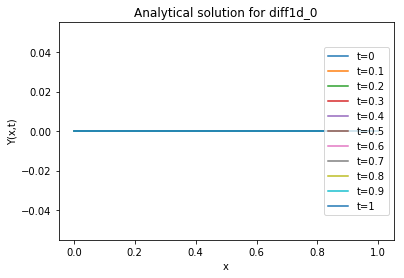

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## CG

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'CG'
options = {}
options['disp'] = True
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 327
         Function evaluations: 784
         Gradient evaluations: 784
1min 48s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
     fun: 1.2880645069188294e-06
     jac: array([ 2.70346491e-06, -3.00390090e-06, -1.75644077e-06,  3.08969535e-09,
        8.33248590e-06, -3.42697605e-06, -3.13850546e-06,  3.81347653e-07,
        7.52649225e-06, -6.09333138e-06,  6.89013875e-07,  1.17899883e-06,
       -4.77446347e-06,  2.90906568e-08, -3.39403756e-07, -6.96425991e-06,
        5.38592368e-07,  6.31652951e-07,  3.81208340e-06, -5.96699529e-06,
        2.38910453e-06,  8.17082737e-07, -8.32774592e-07, -8.22354012e-09,
        2.21873310e-06,  1.36658559e-06, -1.33906960e-06,  4.91591212e-07,
       -3.05113617e-06,  1.03906529e-06, -4.84626136e-07, -2.09024325e-06,
       -2.34886543e-06,  1.62202016e-06,  1.60087896e-06,  4.87883541e-06,
        5.47512698e-07, -6.07235398e-06, 

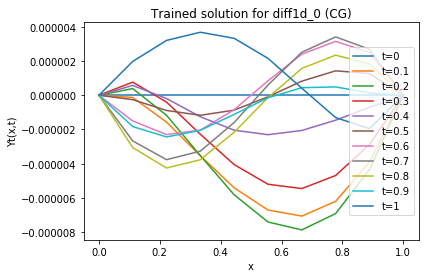

In [7]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

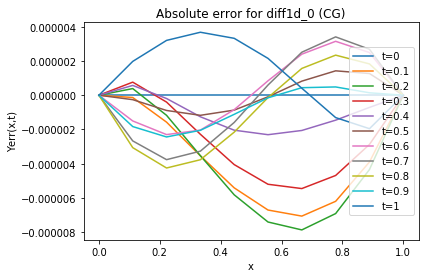

In [8]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

## CG (gtol=1e-6)

In [9]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'CG'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1007
         Function evaluations: 2358
         Gradient evaluations: 2358
5min 26s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
     fun: 1.94580279112538e-08
     jac: array([ 3.84692232e-07, -2.05810213e-07, -1.37667439e-07, -1.72879255e-09,
        9.38648221e-07,  3.63661970e-07, -3.57387080e-07,  2.82529967e-08,
        2.24304274e-07,  2.83298795e-07, -3.30328703e-07,  2.34355144e-07,
       -3.44314090e-07,  3.95669403e-09, -6.27942712e-07, -5.90138759e-07,
        4.06788470e-07,  1.75561477e-08,  2.28551629e-07, -5.75580720e-07,
        1.95879172e-07,  2.69299568e-08, -1.38290068e-08,  3.05502863e-10,
        2.30956337e-07,  1.76732049e-07, -1.63334832e-08,  2.54582940e-08,
       -1.04105936e-07,  1.89350614e-07, -1.57095631e-08, -3.77912158e-07,
       -1.75935322e-07,  4.01023104e-07, -4.00374831e-07,  1.63056709e-07,
       -6.97662152e-07, -5.12545704e-07,

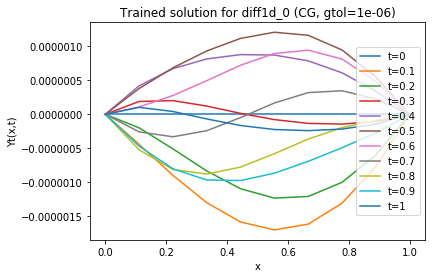

In [10]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

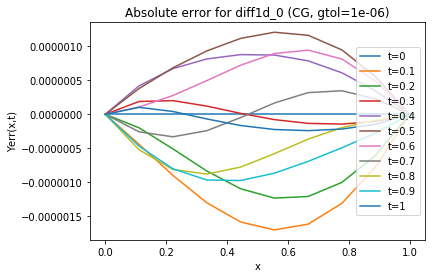

In [11]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## CG (gtol=1e-8)

In [12]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'CG'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

         Current function value: 0.000000
         Iterations: 8000
         Function evaluations: 19141
         Gradient evaluations: 19141
45min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
     fun: 1.0950580301582995e-09
     jac: array([ 6.21192289e-07, -9.73929850e-07,  7.06680393e-07, -4.02109860e-08,
        8.07138596e-07, -8.55998493e-07, -4.31490958e-07, -7.23455548e-09,
       -2.66786145e-07, -1.06598138e-06, -5.97120015e-07,  2.10008534e-07,
       -1.57942216e-07,  2.42845826e-08, -8.23240989e-07,  1.08135749e-07,
        4.02044579e-07, -3.15137804e-08,  2.10736282e-07,  1.31583999e-07,
       -3.11037213e-07,  2.16346947e-07, -1.66813895e-07,  1.02326073e-08,
       -3.16875203e-07,  1.29231166e-07,  1.36632330e-07, -1.60919723e-08,
        1.60606366e-07,  1.53637051e-07,  7.60692643e-07,  1.79221996e-07,
       -4.91151846e-07,  1.14034378e-06,  2.91562332e-07, -4.52391846e-07,
        1.05814573e-07,  7.06376750e-07, -2.49425901e-10,  1.69424555e-06

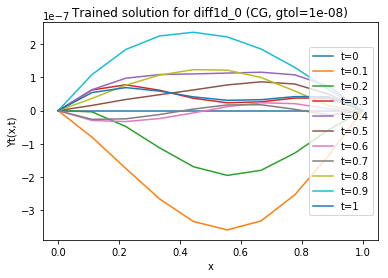

In [13]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

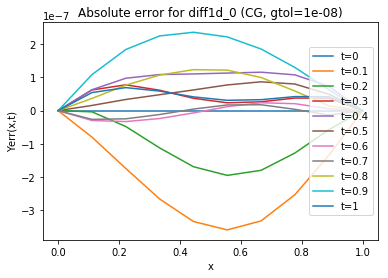

In [14]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## CG (gtol=1e-8, maxiter=16000)

In [15]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'CG'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
options['maxiter'] = 16000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9803
         Function evaluations: 23398
         Gradient evaluations: 23398
52min 44s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
     fun: 7.638676460355147e-10
     jac: array([ 2.26884033e-09,  5.59092860e-09,  3.83004791e-09, -3.50397465e-10,
        4.02347748e-09,  7.24603788e-09,  1.32623642e-09, -3.62402280e-10,
        1.30156091e-09,  9.10512684e-09,  3.09555241e-09, -1.92467971e-09,
        1.16670481e-09, -8.17701808e-10,  6.47212862e-09,  9.03663016e-10,
       -7.28670695e-09, -8.41454016e-10,  1.99165451e-09,  4.88390832e-10,
        4.12792928e-09, -1.13973865e-09,  2.32128500e-09,  1.32050237e-10,
        2.12648465e-09,  8.55612982e-09,  2.87714202e-09,  5.70028095e-10,
       -7.90914775e-10,  8.15069762e-09, -7.49283006e-09, -1.55562334e-09,
        1.65199408e-09, -9.69694391e-09, -5.00066234e-10, -7.08183031e-09,
        2.12489365e-09,  1.77626610e

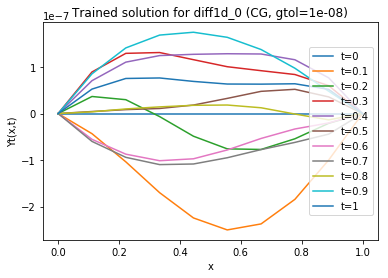

In [16]:
Yt4 = net4.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

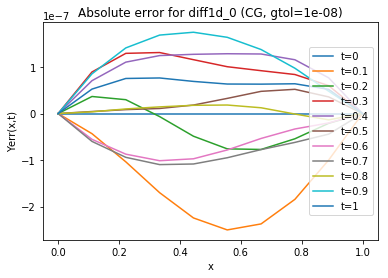

In [17]:
Y_err4 = Yt4 - Ya
for i in range(nt):
    plt.plot(xt, Y_err4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));